# Kesifci Veri Analizi

## Kutuphane Yukleme

In [ ]:
# data analysis libraries:
import numpy as np
import pandas as pd

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

## Warningleri Iptal Etme

In [89]:
# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

## Satirin Tamamini Gorme

In [124]:
# to display all columns:
pd.set_option('display.max_columns', None)

## Veriyi Yukleme

In [49]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Veriyi Yedekleme

In [50]:
df = train_data.copy()
df_t = test_data.copy()

## Veriyi Inceleme

In [51]:
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df["Pclass"].value_counts().sum()

891

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [54]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Kesif Gorsellestirme

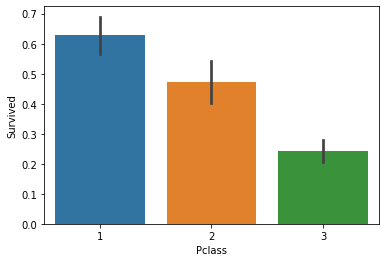

In [56]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df);

# Veri Hazirlama

## Silme

### Degisken Silme

In [57]:
df = df.drop(['Ticket'], axis = 1)

### Verideki Tum Eksik Gozlemleri Silme

In [ ]:
df=df.dropna()

## Aykiri Gozlem Analizi

In [58]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


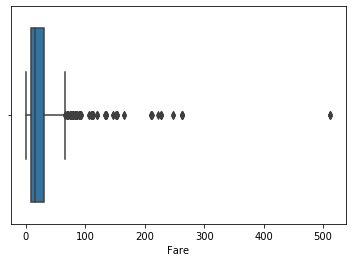

In [59]:
sns.boxplot(x = train['Fare']);

In [60]:
Q1 = train['Fare'].quantile(0.10)
Q3 = train['Fare'].quantile(0.90)
IQR = Q3 - Q1

lower_limit = Q1- 1.5*IQR
print(lower_limit)

upper_limit = Q3 + 1.5*IQR
upper_limit

-98.06245


183.57074999999998

In [61]:
# observations with Fare data higher than the upper limit:
train[train['Fare'] > (upper_limit)].count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            18
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
dtype: int64

### Degerleri Buyukten Kucuge Siralama

In [62]:
train.sort_values("Fare", ascending=False).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### Baskilama - Sinir Degeri Degistirme

In [63]:
df['Fare'] = df['Fare'].replace(512.3292, 300)
df.sort_values("Fare", ascending=False).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,300.0,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,300.0,B101,C


### Baskilama Sinir Degerin Uzerini Toplu Degistirme

In [65]:
df['Fare'] = df['Fare'].replace((df.Fare[df.Fare>250]), 250)
df.sort_values("Fare", ascending=False).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,250.0,NaN,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,250.0,C23 C25 C27,S


## Eksik Veri Analizi

### Eksik Verileri Tespit

#### Tum Verinin Eksik Verilerini Tespit 

In [72]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Degisken Bazinda Eksik Verilerin Tespiti ve Gorme

In [74]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


### Eksik Verileri Doldurma

In [71]:
df["Age"].fillna(df.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

#### Groupby

In [97]:
df.groupby(["Sex","Survived","Pclass"])[["Age","Pclass"]].mean()

Age  Pclass
Sex    Survived Pclass                   
female 0        1       25.666667       1
                2       36.000000       2
                3       23.818182       3
       1        1       34.939024       1
                2       28.080882       2
                3       19.329787       3
male   0        1       44.581967       1
                2       33.369048       2
                3       27.255814       3
       1        1       36.248000       1
                2       16.022000       2
                3       22.274211       3

In [98]:
df.groupby(["Sex","Survived"])["Age"].mean().T

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [95]:
test[["Pclass","Fare"]].groupby("Pclass").aggregate(["max","mean",np.median])

Fare                    
             max       mean   median
Pclass                              
1       512.3292  94.280297  60.0000
2        73.5000  22.202104  15.7500
3        69.5500  12.459678   7.8958

#### Eksik Veriyi Model ile Doldurma

In [ ]:
df1=train[train["Age"].notnull()]
df2=train[train["Age"].isnull()]
df1
df2.head(2)

## Degisken Donusumu

### map 

In [100]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,NaN


In [ ]:
### Label

In [102]:
from sklearn import preprocessing

lbe = preprocessing.LabelEncoder()
train["Sex"] = lbe.fit_transform(train["Sex"])
test["Sex"] = lbe.fit_transform(test["Sex"])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,NaN
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,NaN


### String Okuma

In [103]:
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
test["Title"] = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,NaN,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,NaN,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,NaN,Mr


### replace

In [104]:
train['Title'] = train['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [106]:
test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,NaN,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,NaN,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,NaN,Mr


### map

In [108]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 5}

train['Title'] = train['Title'].map(title_mapping)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked       891
Title          891
dtype: int64

### bin

In [109]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
mylabels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = mylabels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = mylabels)

In [111]:
# Map each Age value to a numerical value:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,NaN,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,NaN,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,NaN,NaN,NaN


### qcut

In [112]:
# Map Fare values into groups of numerical values:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])


In [113]:
# Drop Fare values:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title,AgeGroup,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,NaN,NaN,NaN,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,C85,NaN,NaN,NaN,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,NaN,NaN,NaN,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,C123,NaN,NaN,NaN,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,NaN,NaN,NaN,NaN,2


## Feature Engineering 

### map

In [114]:
train["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [116]:
# Create new feature of family size:

train['Single'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train['SmallFam'] = train['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
train['MedFam'] = train['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeFam'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,NaN,NaN,NaN,NaN,1,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,C85,NaN,NaN,NaN,4,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,NaN,NaN,NaN,NaN,2,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,C123,NaN,NaN,NaN,4,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,NaN,NaN,NaN,NaN,2,1,1,0,0,0


## get_dummies

In [ ]:
# Convert Title and Embarked into dummy variables:

train = pd.get_dummies(train, columns = ["Title"])
train = pd.get_dummies(train, columns = ["Embarked"], prefix="Em")

## astype

In [117]:
# Create categorical values for Pclass:
train["Pclass"] = train["Pclass"].astype("category")
train = pd.get_dummies(train, columns = ["Pclass"],prefix="Pc")

# Modelleme

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]

## train_test_split()

In [119]:
re

## Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

ValueError: could not convert string to float: 'Boulos, Mrs. Joseph (Sultana)'

## Gradient Boosting Classifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

ValueError: could not convert string to float: 'Boulos, Mrs. Joseph (Sultana)'

## Model Tuning

In [122]:
xgb_params = {
        'n_estimators': [200, 500],
        'subsample': [0.6, 1.0],
        'max_depth': [2,5,8],
        'learning_rate': [0.1,0.01,0.02],
        "min_samples_split": [2,5,10]}xgb_params = {
        'n_estimators': [200, 500],
        'subsample': [0.6, 1.0],
        'max_depth': [2,5,8],
        'learning_rate': [0.1,0.01,0.02],
        "min_samples_split": [2,5,10]}

SyntaxError: invalid syntax (<ipython-input-122-9f74cfd50960>, line 6)

In [ ]:
xgb = GradientBoostingClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(x_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb = GradientBoostingClassifier(learning_rate = xgb_cv_model.best_params_["learning_rate"], 
                    max_depth = xgb_cv_model.best_params_["max_depth"],
                    min_samples_split = xgb_cv_model.best_params_["min_samples_split"],
                    n_estimators = xgb_cv_model.best_params_["n_estimators"],
                    subsample = xgb_cv_model.best_params_["subsample"])

In [ ]:
xgb_tuned =  xgb.fit(x_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

# Submisyon Dosyasi

In [123]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = xgb_tuned.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

NameError: name 'xgb_tuned' is not defined